In [1]:
# Standard imports
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add src directory to path for modular imports
sys.path.append('../src')

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

# Custom modules
from data_loader import DataLoader
from data_preprocessor import DataPreprocessor
from eda_analyzer import EDAAnalyzer
from feature_engineer import FeatureEngineer
from imbalance_handler import ImbalanceHandler
from utils import (
    setup_logging, save_processed_data, create_feature_summary,
    memory_usage_optimization, save_experiment_config
)

# Set up logging
setup_logging('INFO')

# Set random seed for reproducibility
np.random.seed(42)

print("✅ All modules imported successfully!")
print("📁 Working directory:", os.getcwd())


✅ All modules imported successfully!
📁 Working directory: c:\Kifiya\Week8\fraud-detection\notebooks


In [2]:
# Initialize data loader
data_loader = DataLoader(data_dir='../data')

# Load all datasets
print("Loading datasets...")
datasets = data_loader.load_all_datasets()

# Get individual datasets
fraud_data = datasets['fraud_data']
ip_country_data = datasets['ip_country']
creditcard_data = datasets['creditcard']

print("\n📊 Dataset Summary:")
print(f"Fraud Data: {fraud_data.shape}")
print(f"IP Country Data: {ip_country_data.shape}")
print(f"Credit Card Data: {creditcard_data.shape}")


INFO:data_loader:Loading fraud data from ..\data\Fraud_Data.csv


Loading datasets...


INFO:data_loader:Loaded fraud data: 151112 rows, 11 columns
INFO:data_loader:Loading IP country data from ..\data\IpAddress_to_Country.csv
INFO:data_loader:Loaded IP country data: 138846 rows, 3 columns
INFO:data_loader:Loading credit card data from ..\data\creditcard.csv
INFO:data_loader:Loaded credit card data: 284807 rows, 31 columns



📊 Dataset Summary:
Fraud Data: (151112, 11)
IP Country Data: (138846, 3)
Credit Card Data: (284807, 31)


In [3]:
# Validate datasets
validation_results = data_loader.validate_datasets()

print("🔍 Dataset Validation Results:")
for dataset_name, results in validation_results.items():
    print(f"\n{dataset_name.upper()}:")
    print(f"  Has duplicates: {results['has_duplicates']}")
    print(f"  Duplicate count: {results['duplicate_count']}")
    
    # Show columns with missing values
    missing_cols = {k: v for k, v in results['missing_percentage'].items() if v > 0}
    if missing_cols:
        print(f"  Missing values: {missing_cols}")
    else:
        print(f"  Missing values: None")


🔍 Dataset Validation Results:

FRAUD_DATA:
  Has duplicates: False
  Duplicate count: 0
  Missing values: None

IP_COUNTRY:
  Has duplicates: False
  Duplicate count: 0
  Missing values: None

CREDITCARD:
  Has duplicates: True
  Duplicate count: 1081
  Missing values: None


In [4]:
# Display basic information about fraud dataset
print("🎯 FRAUD DATA OVERVIEW")
print("=" * 50)
print(f"Shape: {fraud_data.shape}")
print(f"\nColumns: {list(fraud_data.columns)}")
print(f"\nData types:")
print(fraud_data.dtypes)
print(f"\nFirst few rows:")
fraud_data.head()


🎯 FRAUD DATA OVERVIEW
Shape: (151112, 11)

Columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']

Data types:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

First few rows:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
# Display basic information about credit card dataset
print("💳 CREDIT CARD DATA OVERVIEW")
print("=" * 50)
print(f"Shape: {creditcard_data.shape}")
print(f"\nColumns: {list(creditcard_data.columns)}")
print(f"\nData types:")
print(creditcard_data.dtypes)
print(f"\nFirst few rows:")
creditcard_data.head()


💳 CREDIT CARD DATA OVERVIEW
Shape: (284807, 31)

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Data types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

First few rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Display basic information about IP country dataset
print("🌍 IP COUNTRY DATA OVERVIEW")
print("=" * 50)
print(f"Shape: {ip_country_data.shape}")
print(f"\nColumns: {list(ip_country_data.columns)}")
print(f"\nData types:")
print(ip_country_data.dtypes)
print(f"\nFirst few rows:")
ip_country_data.head()


🌍 IP COUNTRY DATA OVERVIEW
Shape: (138846, 3)

Columns: ['lower_bound_ip_address', 'upper_bound_ip_address', 'country']

Data types:
lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

First few rows:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [7]:
# Initialize preprocessor
preprocessor = DataPreprocessor()

# Handle missing values in fraud data
print("🧹 HANDLING MISSING VALUES")
print("=" * 50)

# Define missing value strategy for fraud data
fraud_missing_strategy = {
    'age': 'median',
    'source': 'mode',
    'browser': 'mode'
}

fraud_data_clean = preprocessor.handle_missing_values(
    fraud_data, strategy=fraud_missing_strategy
)

print(f"Fraud data shape after handling missing values: {fraud_data_clean.shape}")


INFO:data_preprocessor:Missing values handled. Shape: (151112, 11)


🧹 HANDLING MISSING VALUES
Fraud data shape after handling missing values: (151112, 11)


In [8]:
# Remove duplicates
print("\n🗑️ REMOVING DUPLICATES")
print("=" * 50)

fraud_data_clean = preprocessor.remove_duplicates(fraud_data_clean)
creditcard_data_clean = preprocessor.remove_duplicates(creditcard_data)
ip_country_data_clean = preprocessor.remove_duplicates(ip_country_data)

print(f"Final shapes after cleaning:")
print(f"  Fraud data: {fraud_data_clean.shape}")
print(f"  Credit card data: {creditcard_data_clean.shape}")
print(f"  IP country data: {ip_country_data_clean.shape}")



🗑️ REMOVING DUPLICATES


INFO:data_preprocessor:Removed 1081 duplicate rows


Final shapes after cleaning:
  Fraud data: (151112, 11)
  Credit card data: (283726, 31)
  IP country data: (138846, 3)


In [9]:
# Convert IP addresses and merge with geolocation data
print("\n🌐 MERGING GEOLOCATION DATA")
print("=" * 50)

# Convert IP addresses to integers
fraud_data_with_ip = preprocessor.convert_ip_addresses(fraud_data_clean)

# Merge with country data
fraud_data_merged = preprocessor.merge_ip_geolocation(
    fraud_data_with_ip, ip_country_data_clean
)

print(f"Merged data shape: {fraud_data_merged.shape}")
print(f"Countries mapped: {fraud_data_merged['country'].notna().sum()} out of {len(fraud_data_merged)}")
print(f"Top countries: {fraud_data_merged['country'].value_counts().head()}")



🌐 MERGING GEOLOCATION DATA


INFO:data_preprocessor:Merged geolocation data. 0 IPs matched to countries


Merged data shape: (151112, 13)
Countries mapped: 0 out of 151112
Top countries: Series([], Name: count, dtype: int64)


In [10]:
# Initialize EDA analyzer
eda_analyzer = EDAAnalyzer(figsize=(12, 8))

# Dataset overviews
print("📈 DATASET OVERVIEWS")
print("=" * 50)

fraud_overview = eda_analyzer.dataset_overview(fraud_data_merged, "Fraud Data")
creditcard_overview = eda_analyzer.dataset_overview(creditcard_data_clean, "Credit Card Data")

print("\nFraud Data Overview:")
for key, value in fraud_overview.items():
    if key not in ['columns', 'data_types', 'missing_values', 'missing_percentage']:
        print(f"  {key}: {value}")

print("\nCredit Card Data Overview:")
for key, value in creditcard_overview.items():
    if key not in ['columns', 'data_types', 'missing_values', 'missing_percentage']:
        print(f"  {key}: {value}")


📈 DATASET OVERVIEWS


INFO:eda_analyzer:Generated overview for Fraud Data: 151112 rows, 13 columns
INFO:eda_analyzer:Generated overview for Credit Card Data: 283726 rows, 31 columns



Fraud Data Overview:
  dataset_name: Fraud Data
  shape: (151112, 13)
  memory_usage_mb: 46.51563835144043
  duplicate_rows: 0
  class_distribution: {0: 136961, 1: 14151}
  class_balance_ratio: 0.10332138345952498

Credit Card Data Overview:
  dataset_name: Credit Card Data
  shape: (283726, 31)
  memory_usage_mb: 69.26904296875
  duplicate_rows: 0
  class_distribution: {0: 283253, 1: 473}
  class_balance_ratio: 0.0016698852262818046


⚖️ CLASS IMBALANCE ANALYSIS


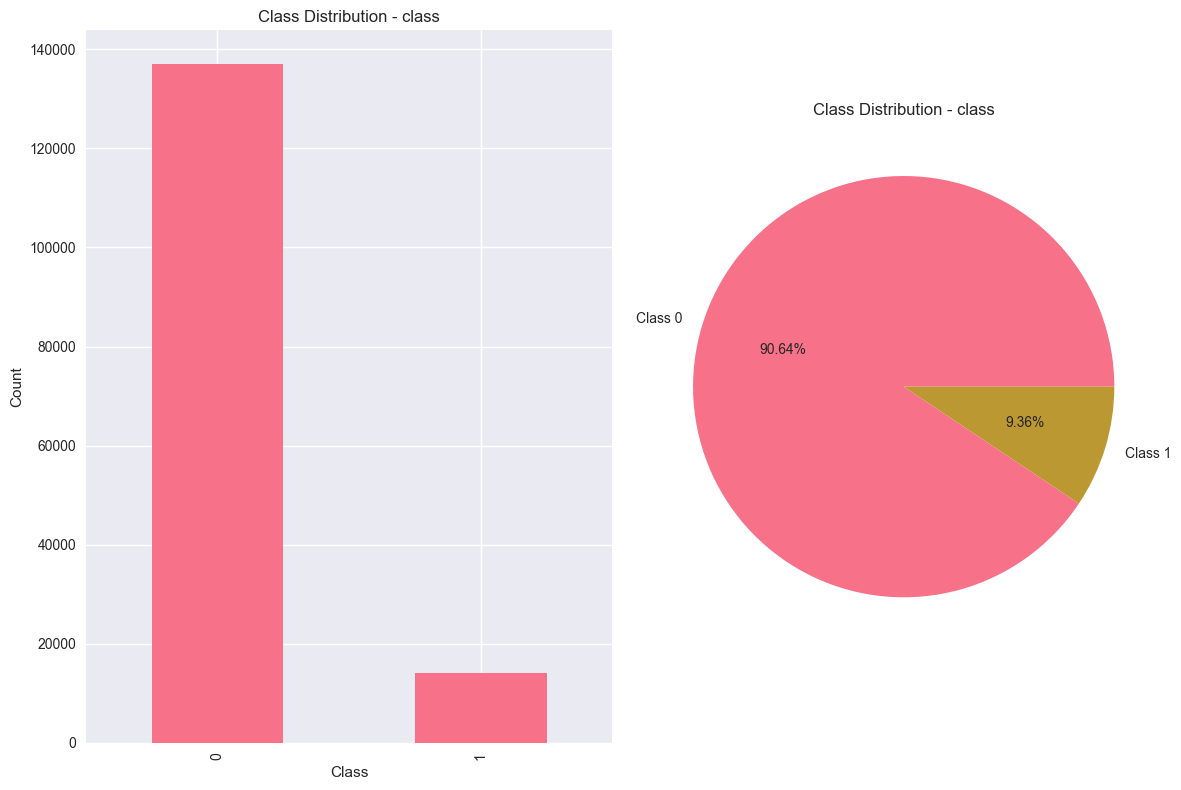


Class Imbalance Analysis for class:
Majority class count: 136,961
Minority class count: 14,151
Imbalance ratio: 0.1033
Imbalance severity: Moderate


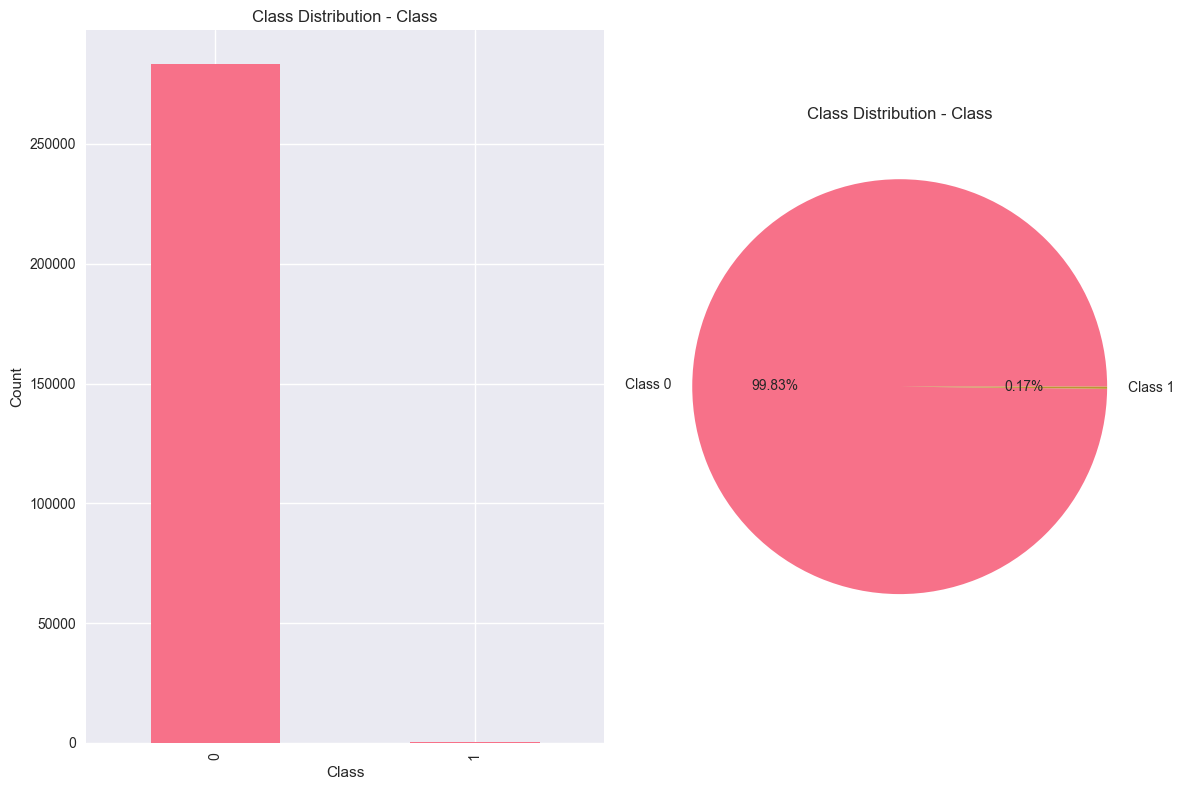


Class Imbalance Analysis for Class:
Majority class count: 283,253
Minority class count: 473
Imbalance ratio: 0.0017
Imbalance severity: Severe


In [11]:
# Class imbalance analysis
print("⚖️ CLASS IMBALANCE ANALYSIS")
print("=" * 50)

# Analyze fraud data class distribution
fraud_imbalance = eda_analyzer.class_imbalance_analysis(fraud_data_merged, 'class')

# Analyze credit card data class distribution
creditcard_imbalance = eda_analyzer.class_imbalance_analysis(creditcard_data_clean, 'Class')



📊 UNIVARIATE ANALYSIS - NUMERICAL FEATURES
Fraud Data - Numerical Features:


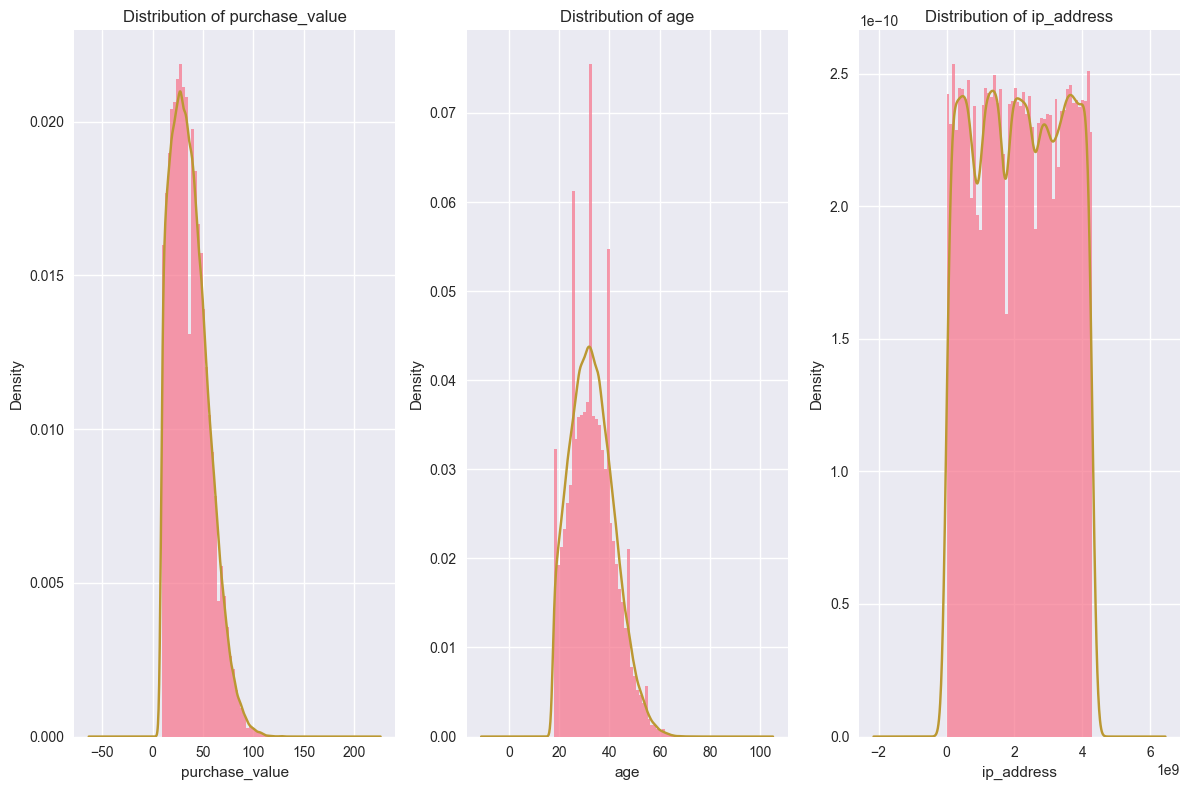


Numerical Features Statistical Summary:
       purchase_value            age    ip_address
count   151112.000000  151112.000000  1.511120e+05
mean        36.935372      33.140704  2.152145e+09
std         18.322762       8.617733  1.248497e+09
min          9.000000      18.000000  5.209350e+04
25%         22.000000      27.000000  1.085934e+09
50%         35.000000      33.000000  2.154770e+09
75%         49.000000      39.000000  3.243258e+09
max        154.000000      76.000000  4.294850e+09


In [12]:
# Univariate analysis - numerical features
print("\n📊 UNIVARIATE ANALYSIS - NUMERICAL FEATURES")
print("=" * 50)

# Fraud data numerical analysis
print("Fraud Data - Numerical Features:")
eda_analyzer.univariate_analysis_numerical(fraud_data_merged)


Credit Card Data - Numerical Features (Sample):


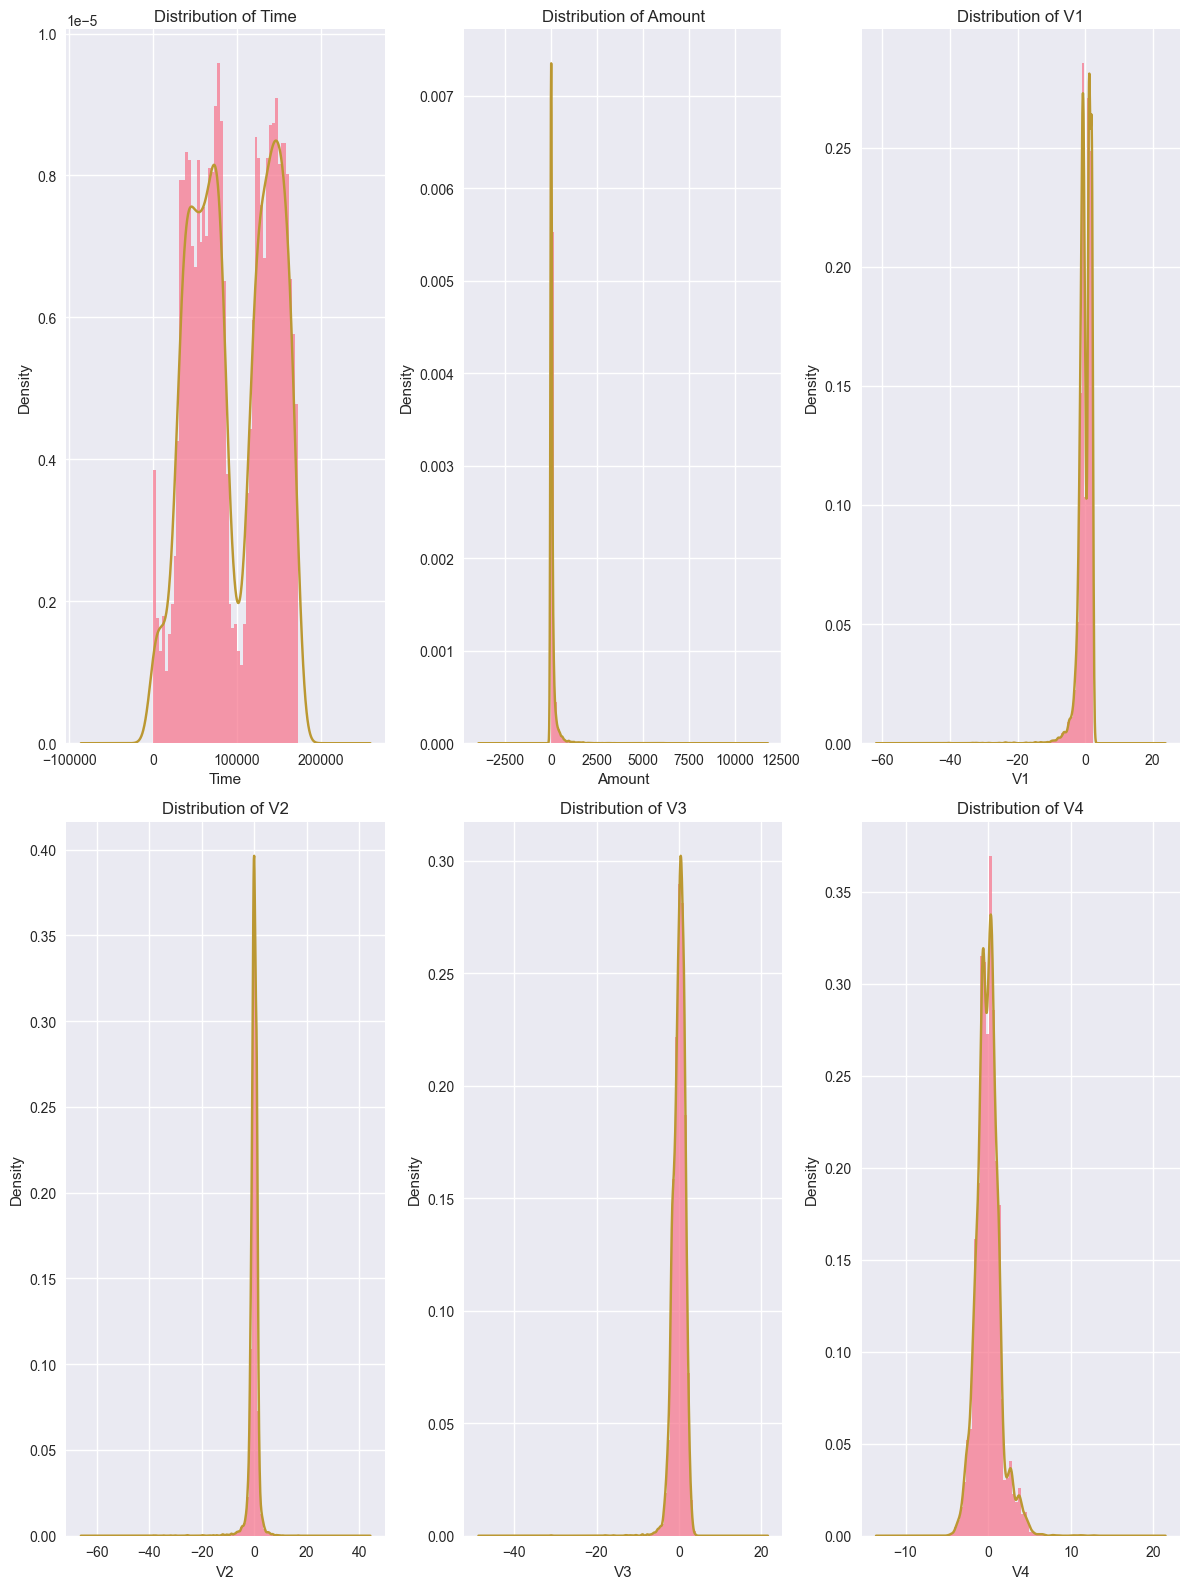


Numerical Features Statistical Summary:
                Time        Amount            V1            V2            V3  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    95257.637900     87.280864      0.008430     -0.030886      0.008985   
std     47387.096377    227.652010      2.045923      1.761597      1.492256   
min        12.000000      0.000000    -40.470142    -38.436817    -31.103685   
25%     54462.000000      5.930000     -0.916641     -0.589001     -0.873144   
50%     85272.500000     22.900000      0.027718      0.057341      0.182875   
75%    139924.750000     78.000000      1.315578      0.793441      1.030023   
max    172759.000000   7862.390000      2.404663     16.713389      4.040465   

                 V4  
count  10000.000000  
mean       0.001166  
std        1.420786  
min       -4.811194  
25%       -0.846516  
50%       -0.031862  
75%        0.724056  
max       12.699542  


In [13]:
# Credit card data numerical analysis (sample due to size)
print("Credit Card Data - Numerical Features (Sample):")
creditcard_sample = creditcard_data_clean.sample(n=10000, random_state=42)
eda_analyzer.univariate_analysis_numerical(creditcard_sample, ['Time', 'Amount', 'V1', 'V2', 'V3', 'V4'])



📊 UNIVARIATE ANALYSIS - CATEGORICAL FEATURES
Fraud Data - Categorical Features:


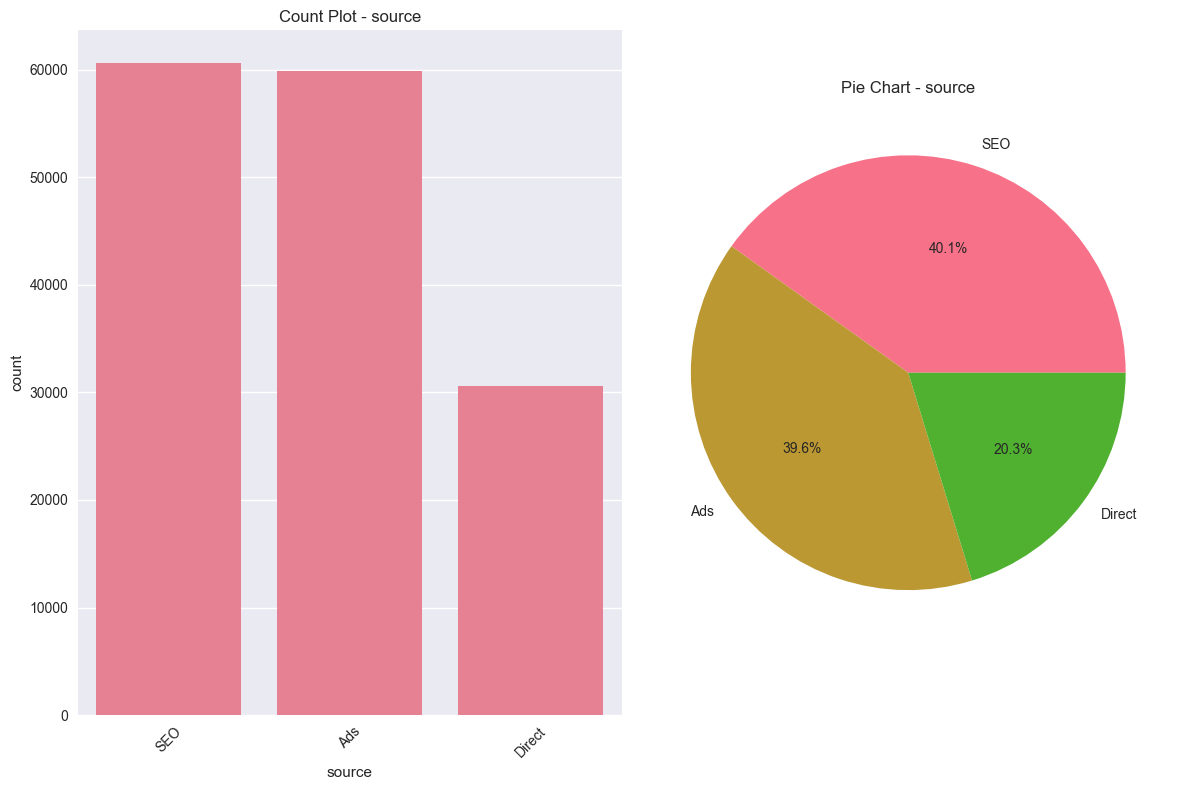


source - Value Counts:
source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64
Unique values: 3
------------------------------


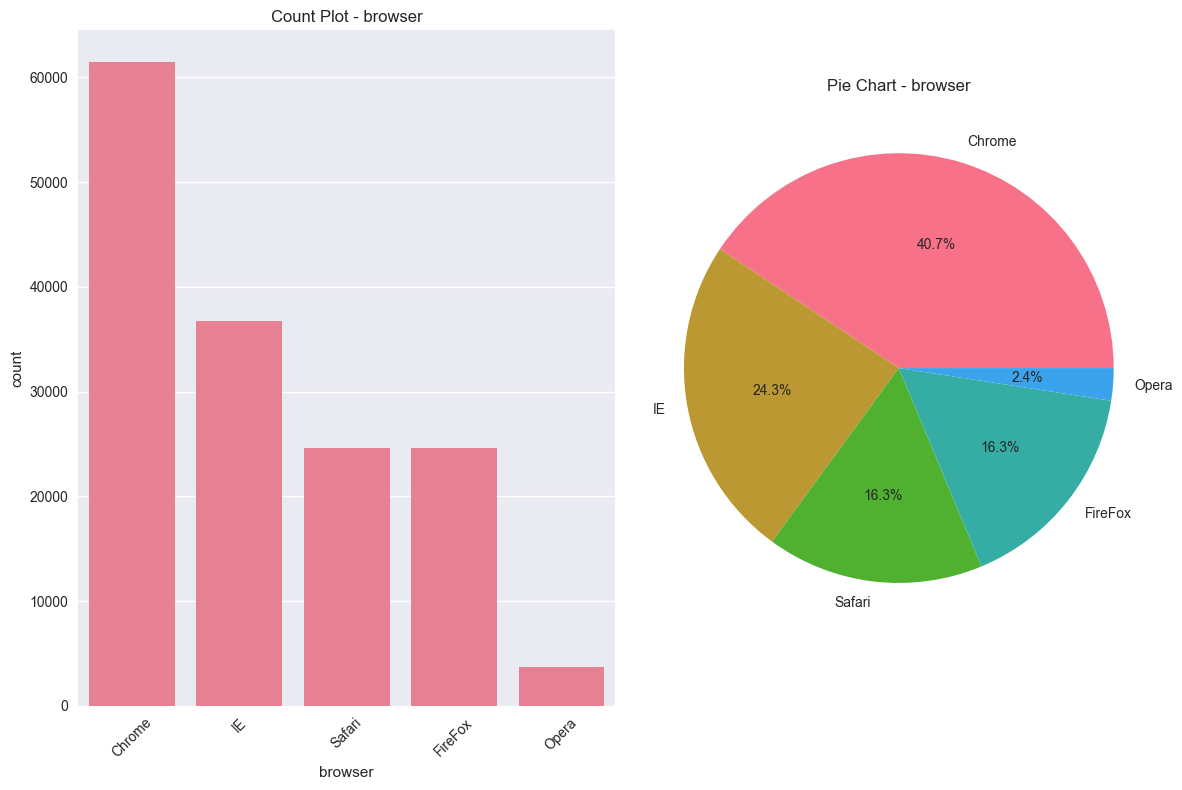


browser - Value Counts:
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64
Unique values: 5
------------------------------


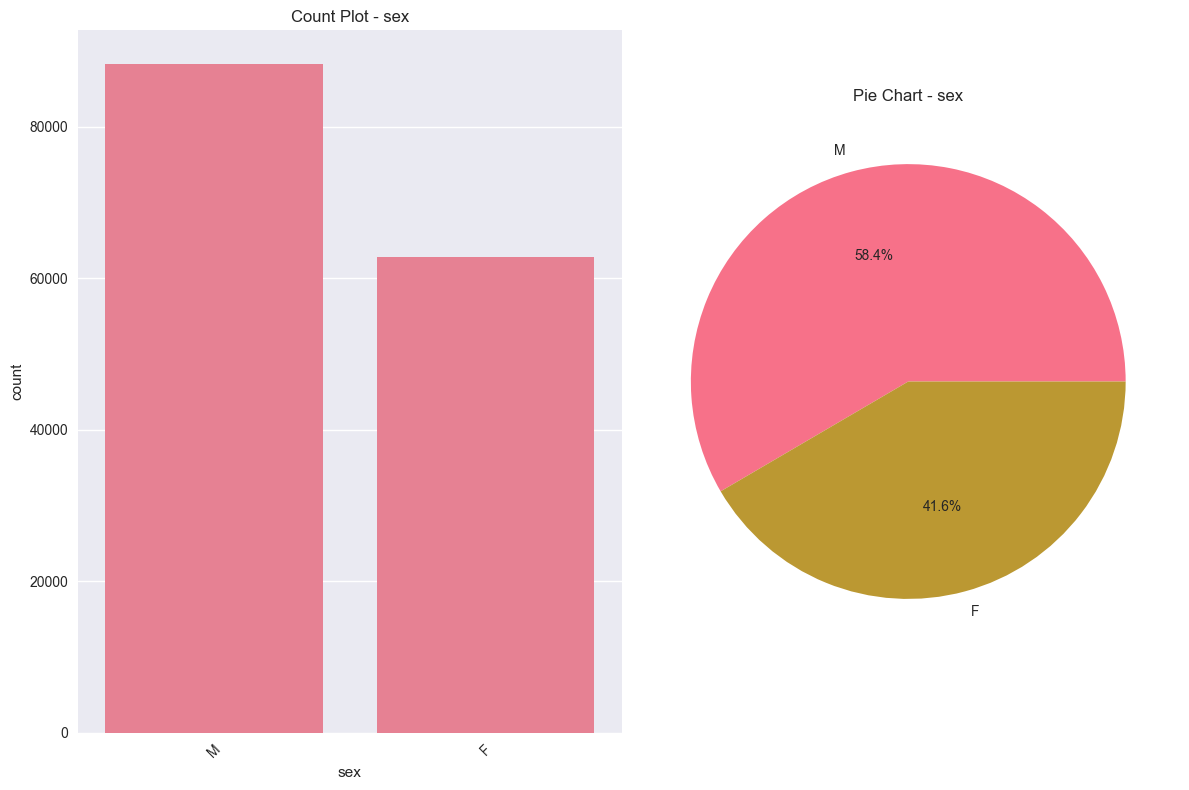


sex - Value Counts:
sex
M    88293
F    62819
Name: count, dtype: int64
Unique values: 2
------------------------------


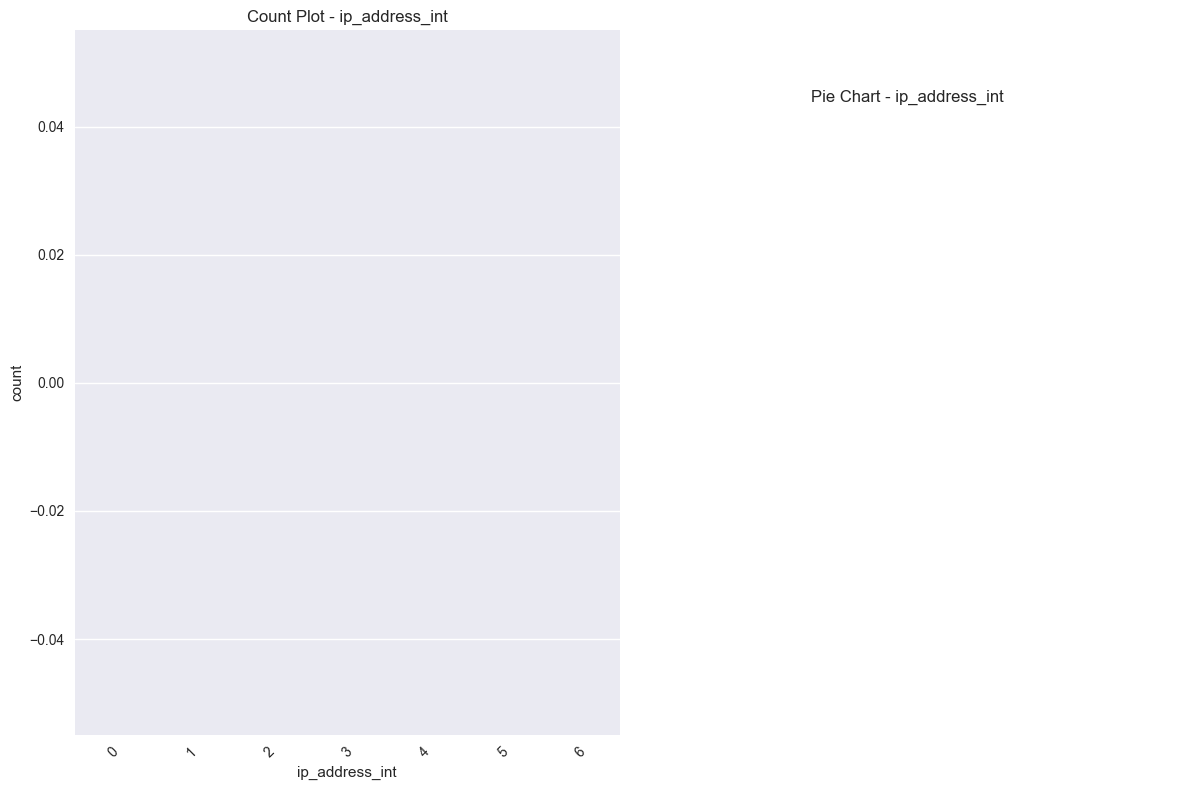


ip_address_int - Value Counts:
Series([], Name: count, dtype: int64)
Unique values: 0
------------------------------


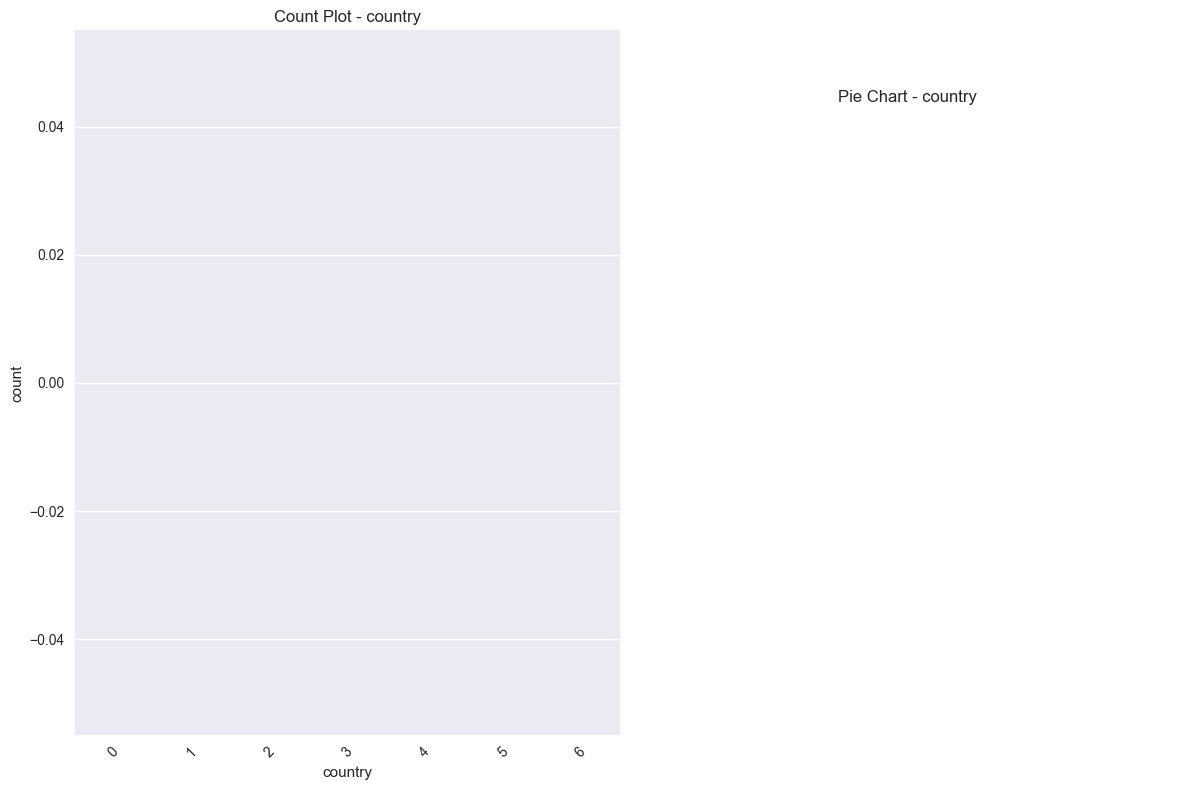


country - Value Counts:
Series([], Name: count, dtype: int64)
Unique values: 0
------------------------------


In [14]:
# Univariate analysis - categorical features
print("\n📊 UNIVARIATE ANALYSIS - CATEGORICAL FEATURES")
print("=" * 50)

# Fraud data categorical analysis
print("Fraud Data - Categorical Features:")
eda_analyzer.univariate_analysis_categorical(fraud_data_merged)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



🔍 BIVARIATE ANALYSIS WITH TARGET
Fraud Data - Features vs Target:
Bivariate Analysis - Numerical Features vs class


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


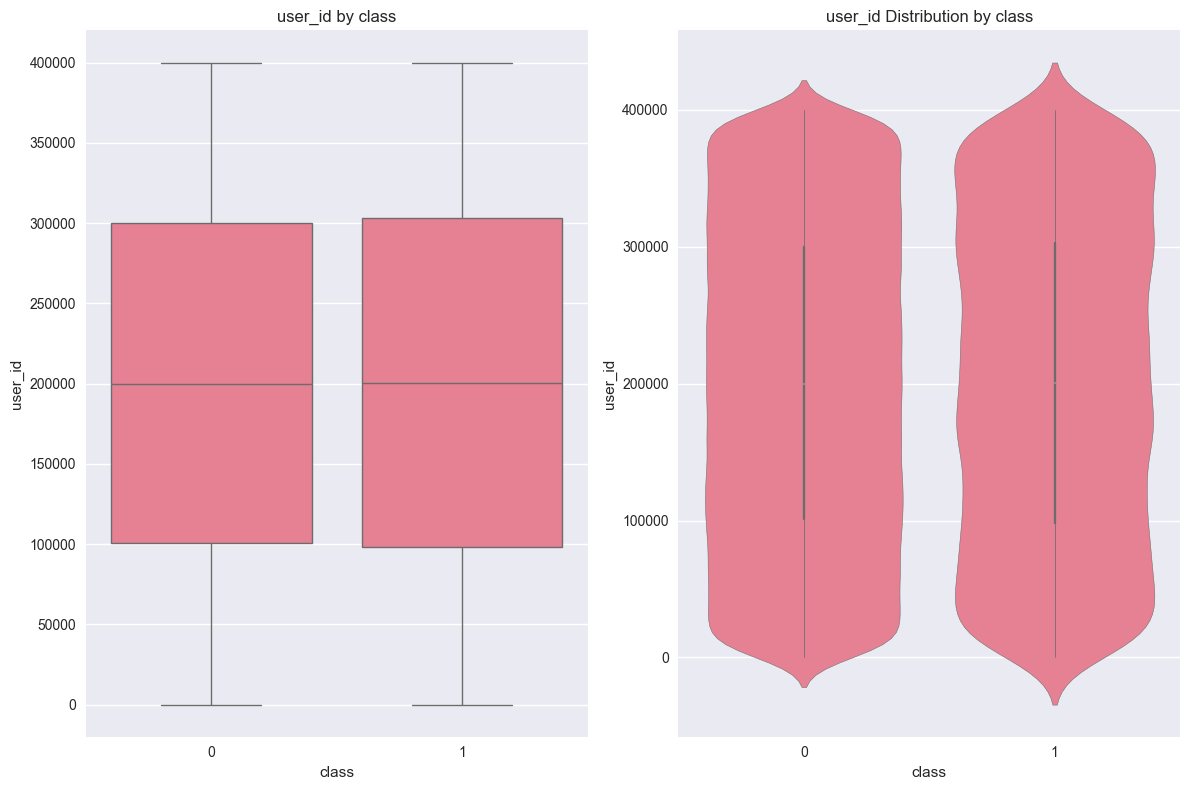

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



user_id:
  Fraud transactions mean: 200869.07
  Normal transactions mean: 200098.92
  Difference: 770.15


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


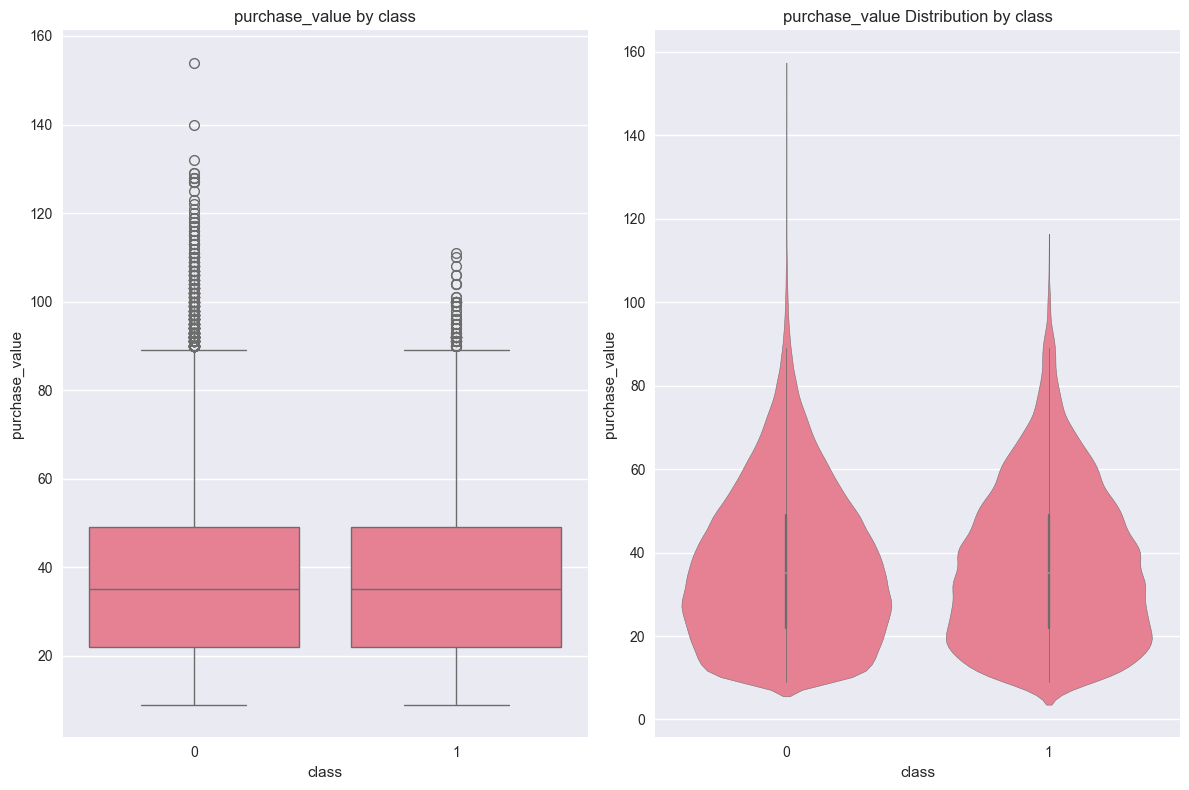

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



purchase_value:
  Fraud transactions mean: 36.99
  Normal transactions mean: 36.93
  Difference: 0.06


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


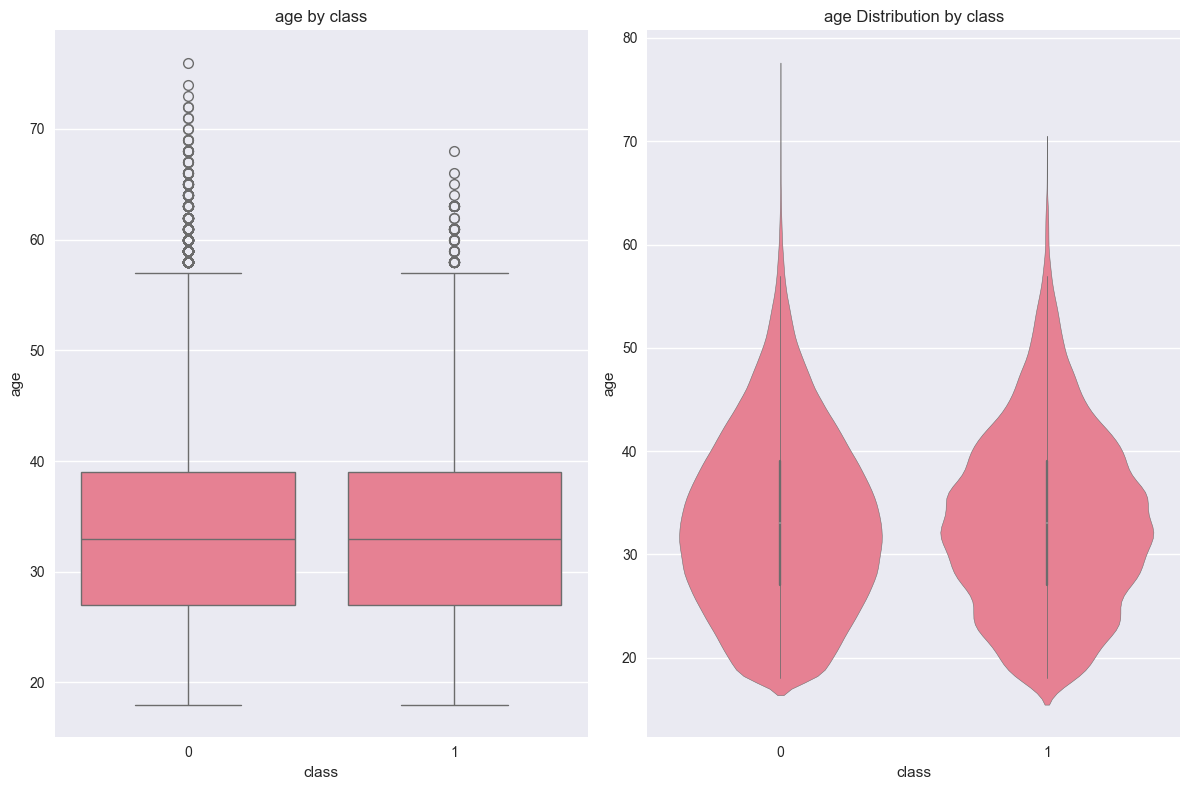

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



age:
  Fraud transactions mean: 33.32
  Normal transactions mean: 33.12
  Difference: 0.20


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


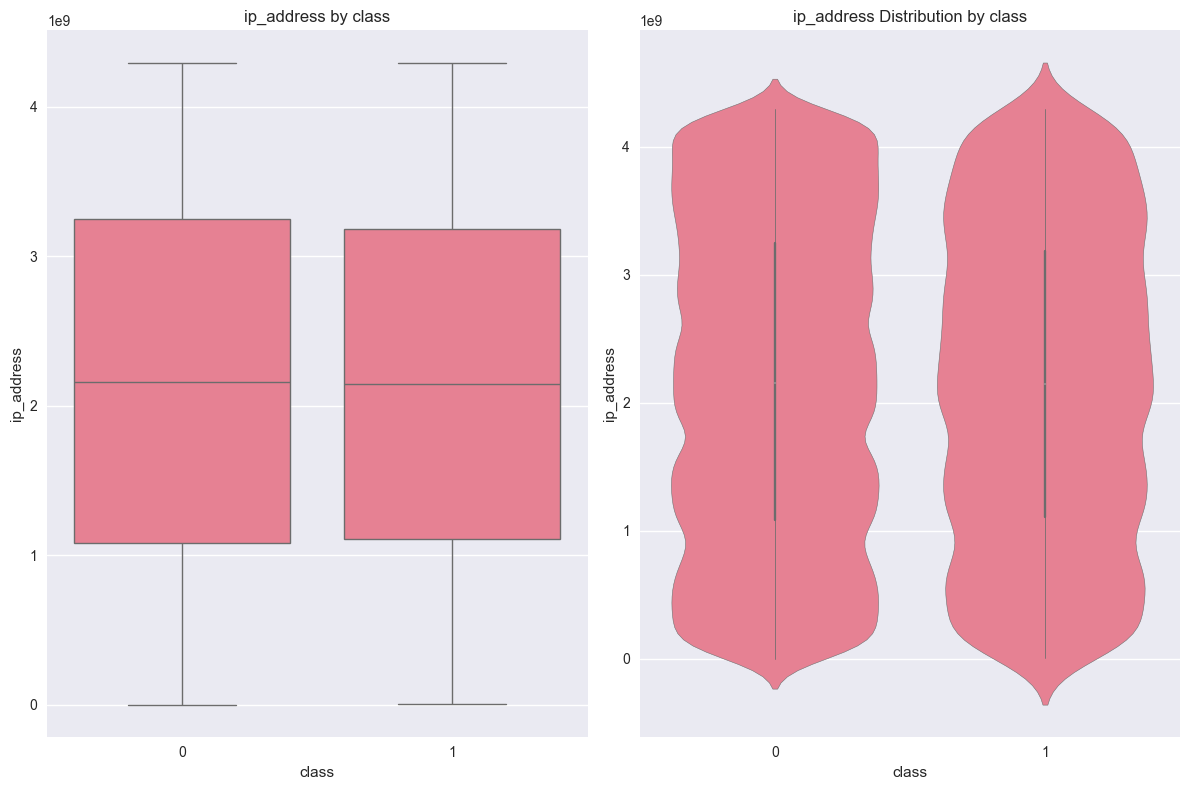


ip_address:
  Fraud transactions mean: 2131918067.39
  Normal transactions mean: 2154235239.81
  Difference: 22317172.43

Bivariate Analysis - Categorical Features vs class


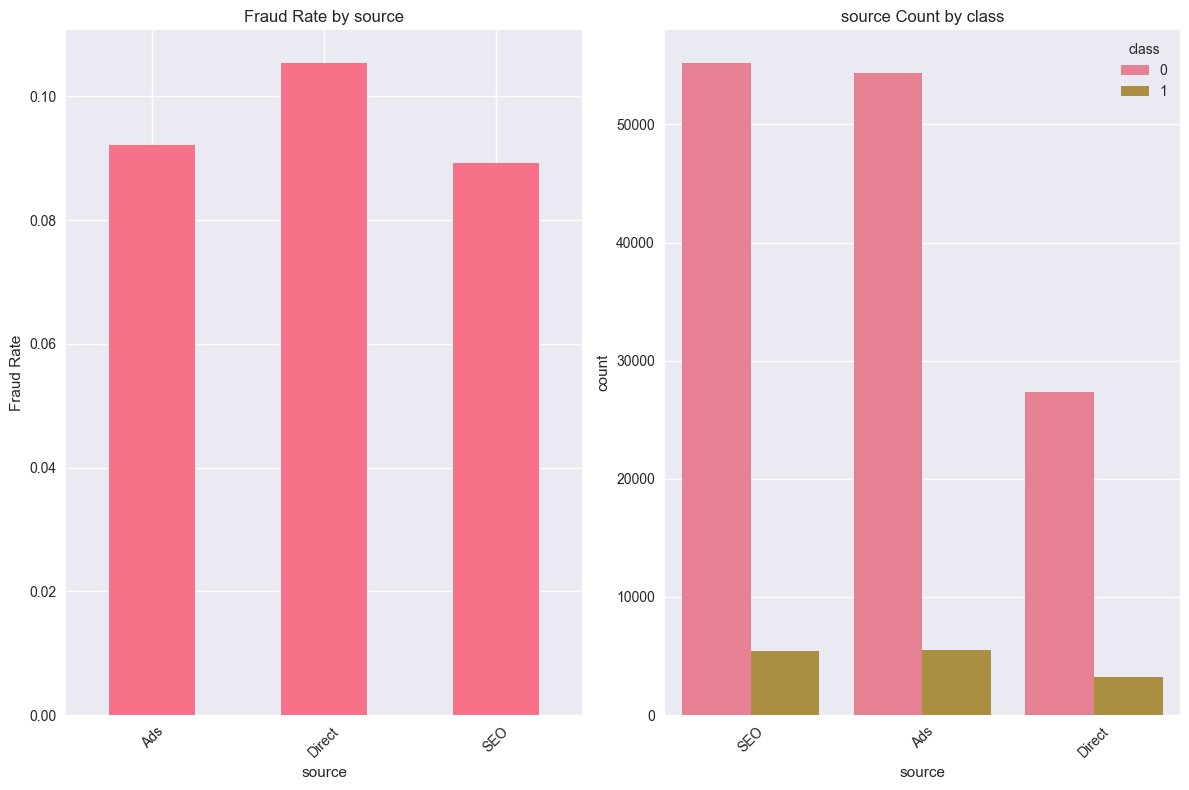


source - Fraud Rate Analysis:
        count  fraud_rate
source                   
Ads     59881    0.092066
Direct  30616    0.105370
SEO     60615    0.089285


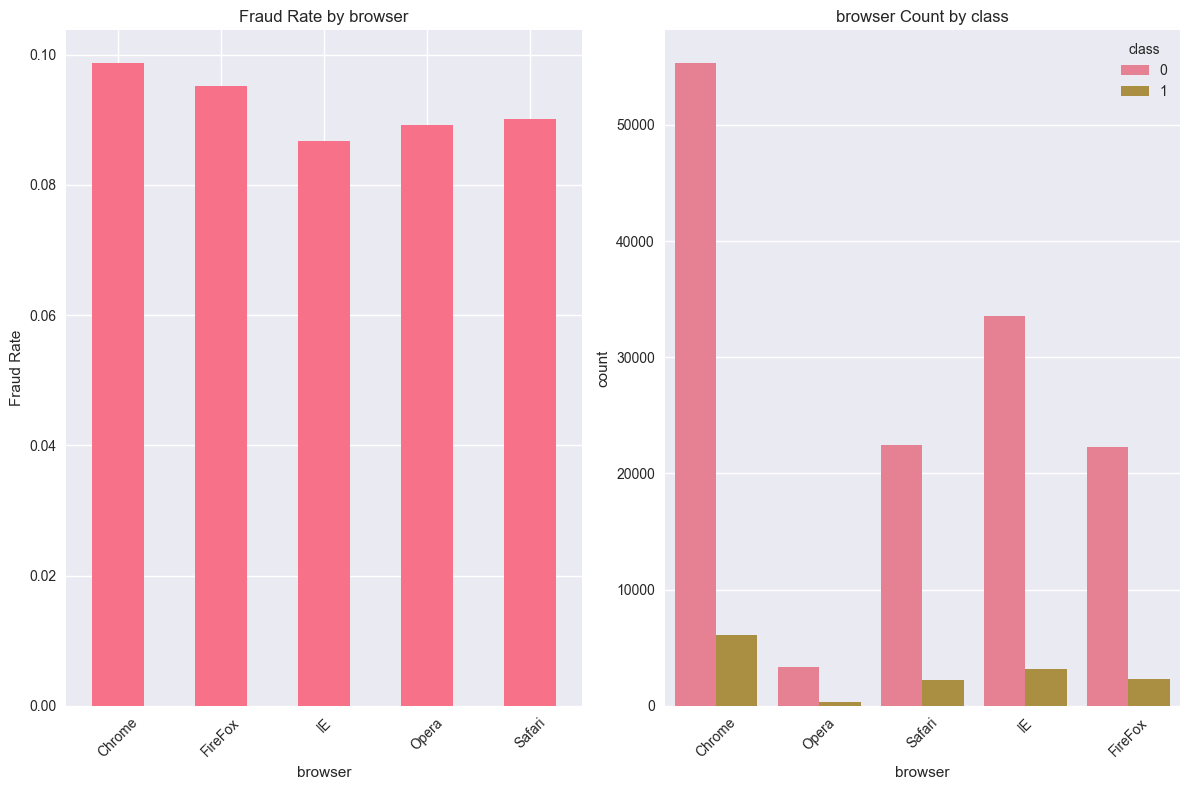


browser - Fraud Rate Analysis:
         count  fraud_rate
browser                   
Chrome   61432    0.098792
FireFox  24610    0.095165
IE       36727    0.086775
Opera     3676    0.089227
Safari   24667    0.090201


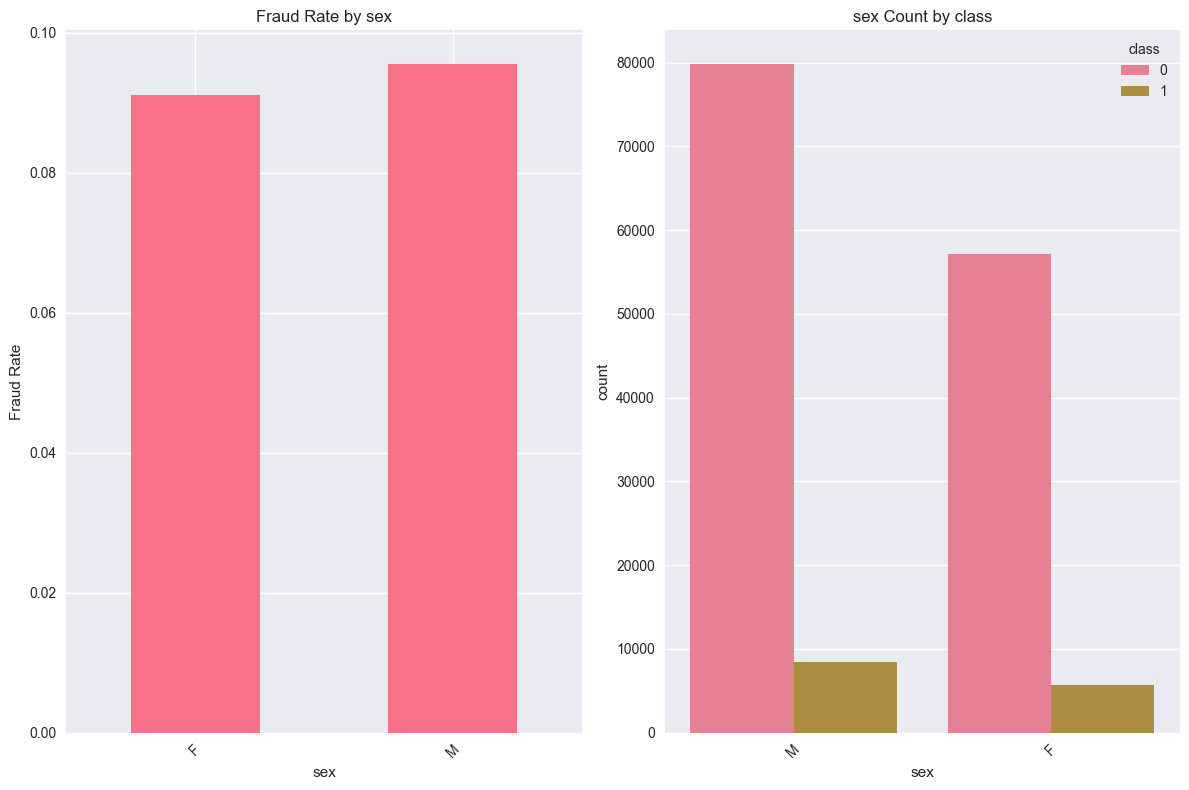


sex - Fraud Rate Analysis:
     count  fraud_rate
sex                   
F    62819    0.091007
M    88293    0.095523


In [15]:
# Bivariate analysis with target variable
print("\n🔍 BIVARIATE ANALYSIS WITH TARGET")
print("=" * 50)

# Fraud data bivariate analysis
print("Fraud Data - Features vs Target:")
eda_analyzer.bivariate_analysis_with_target(fraud_data_merged, 'class')


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Credit Card Data - Features vs Target (Sample):
Bivariate Analysis - Numerical Features vs Class


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


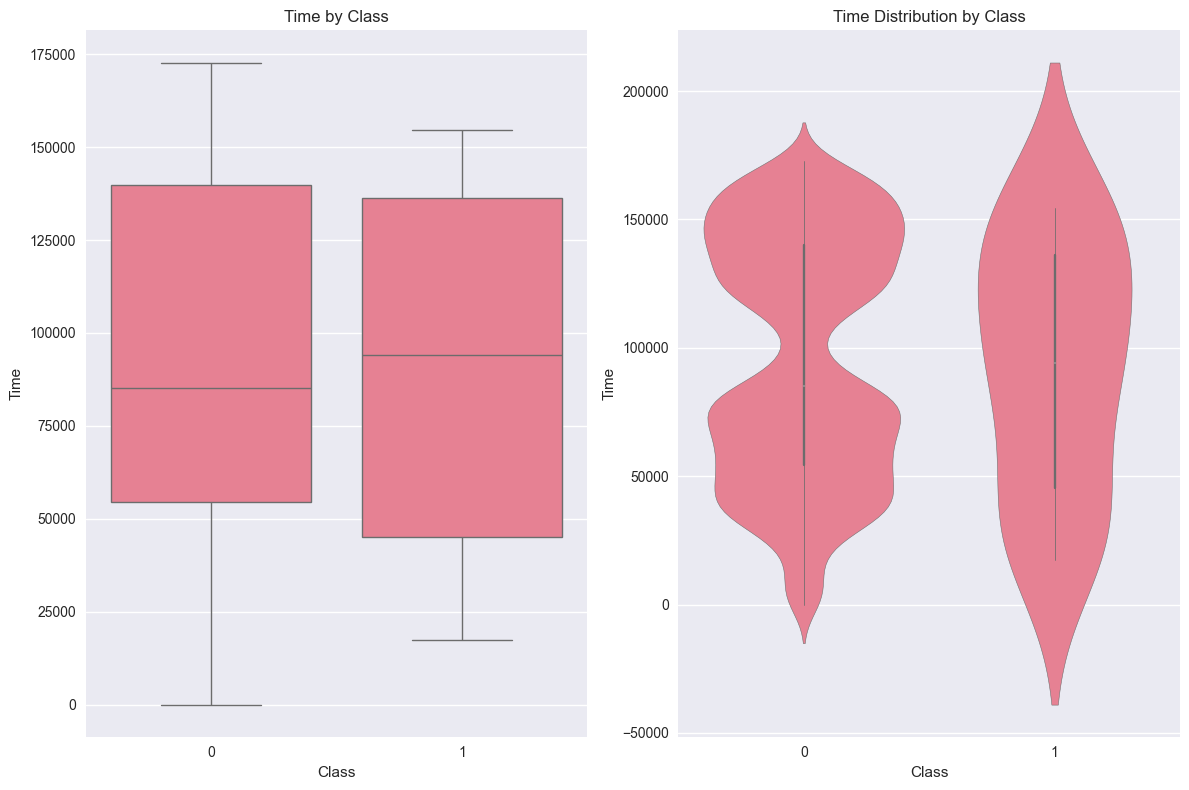

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



Time:
  Fraud transactions mean: 92747.81
  Normal transactions mean: 95261.66
  Difference: 2513.85


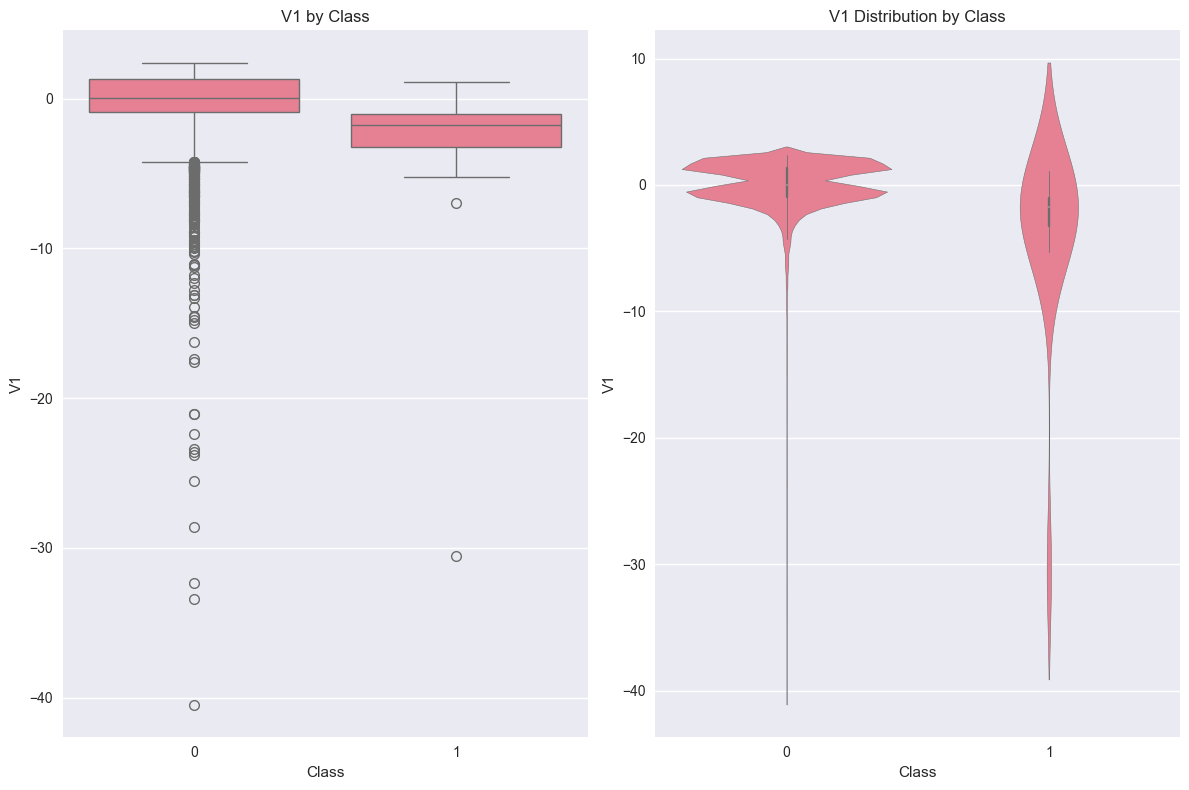

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



V1:
  Fraud transactions mean: -3.73
  Normal transactions mean: 0.01
  Difference: 3.74


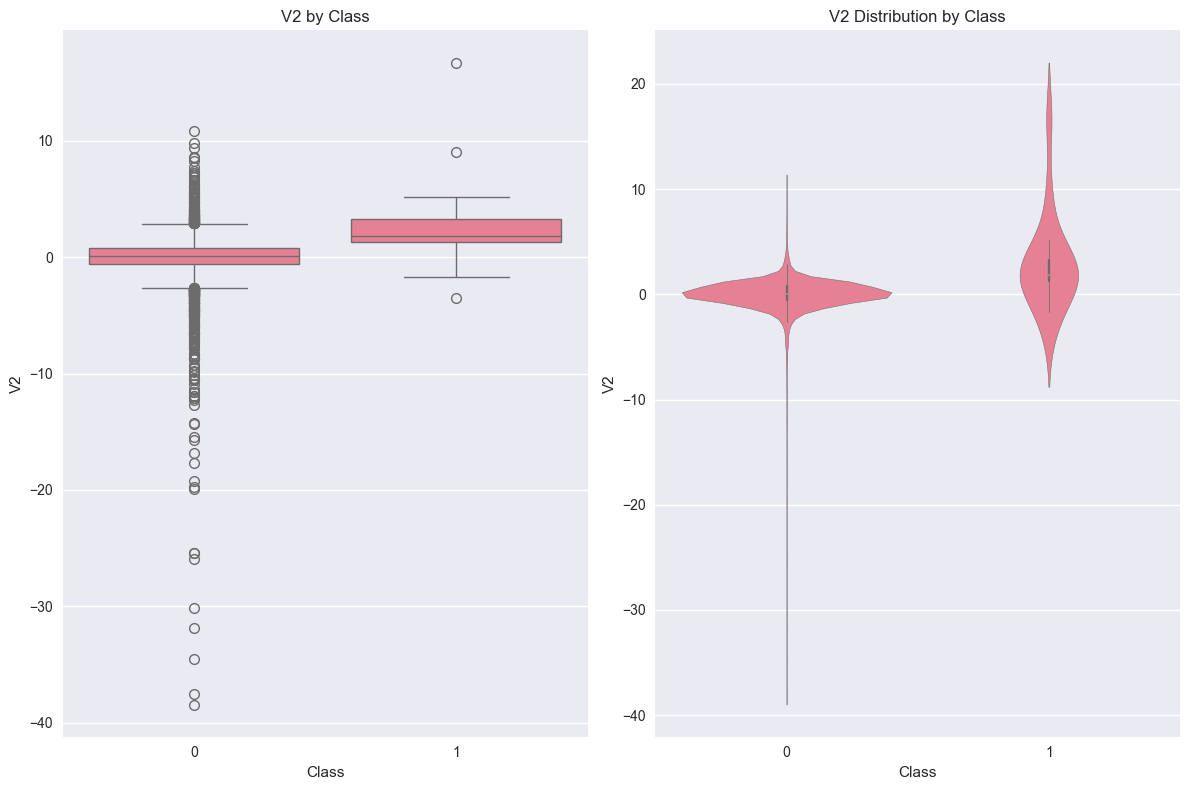

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



V2:
  Fraud transactions mean: 2.87
  Normal transactions mean: -0.04
  Difference: 2.90


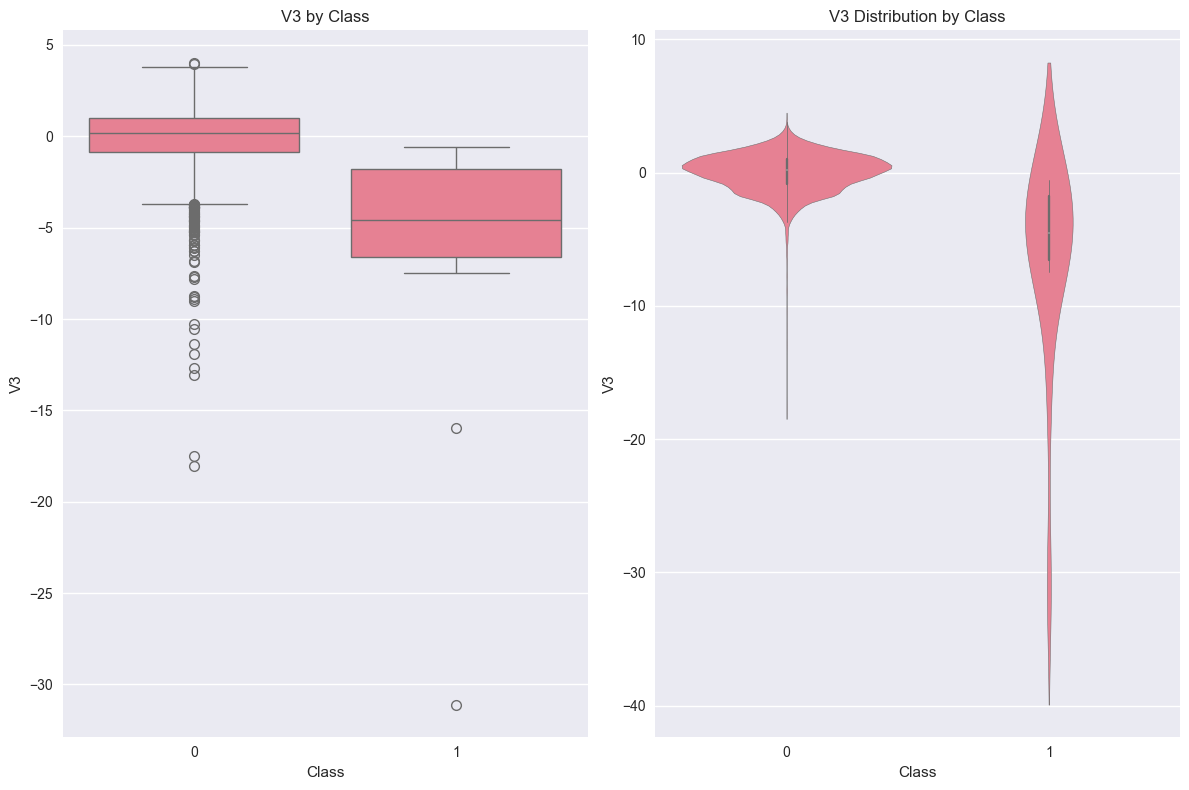

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



V3:
  Fraud transactions mean: -6.18
  Normal transactions mean: 0.02
  Difference: 6.20


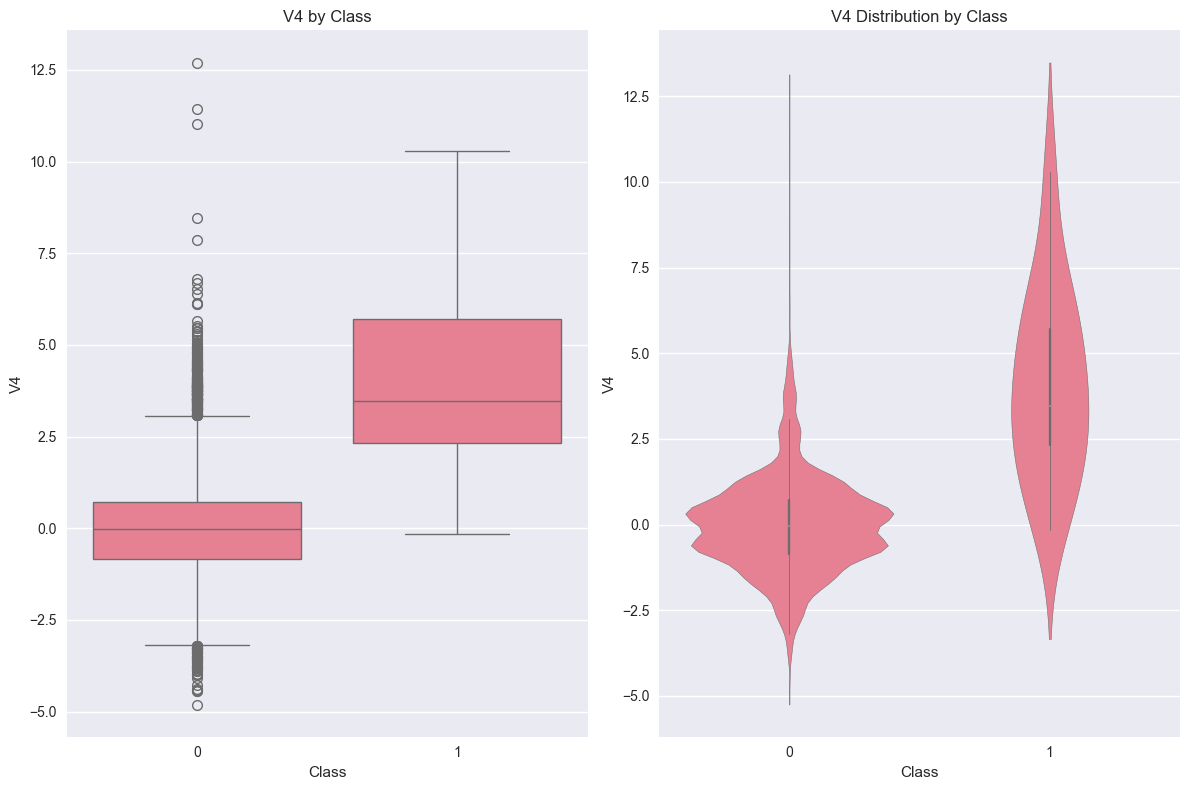

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



V4:
  Fraud transactions mean: 4.05
  Normal transactions mean: -0.01
  Difference: 4.06


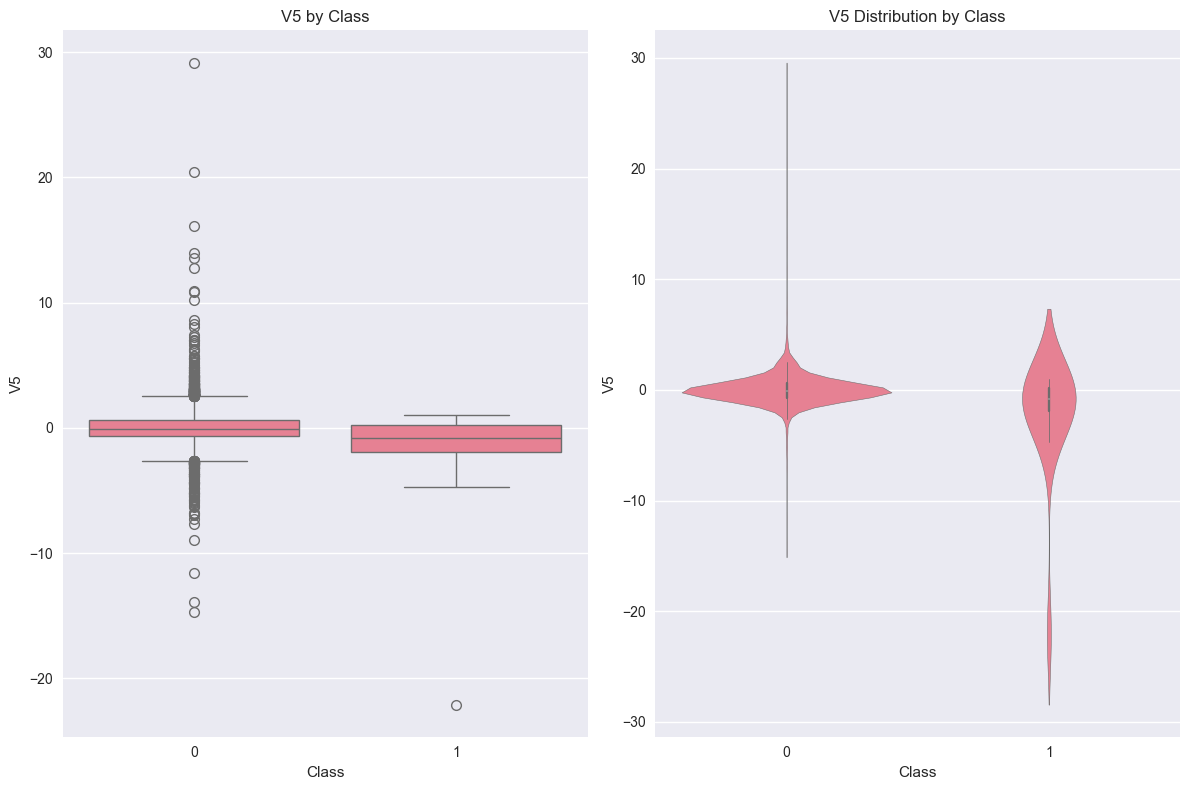


V5:
  Fraud transactions mean: -2.25
  Normal transactions mean: 0.02
  Difference: 2.26

Bivariate Analysis - Categorical Features vs Class


In [16]:
# Credit card data bivariate analysis (sample)
print("Credit Card Data - Features vs Target (Sample):")
eda_analyzer.bivariate_analysis_with_target(creditcard_sample, 'Class')



🔗 CORRELATION ANALYSIS
Fraud Data - Correlation Analysis:


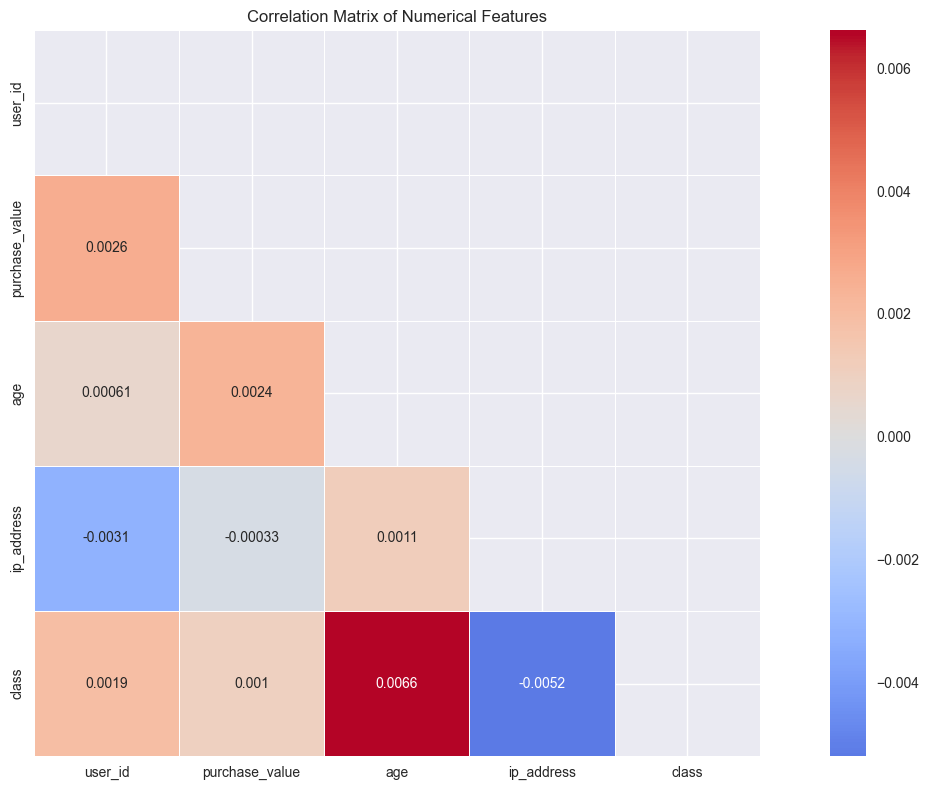


Top correlations with class:
age: 0.007
ip_address: 0.005
user_id: 0.002
purchase_value: 0.001


In [17]:
# Correlation analysis
print("\n🔗 CORRELATION ANALYSIS")
print("=" * 50)

# Fraud data correlation
print("Fraud Data - Correlation Analysis:")
eda_analyzer.correlation_analysis(fraud_data_merged, 'class')


Credit Card Data - Correlation Analysis (Sample):


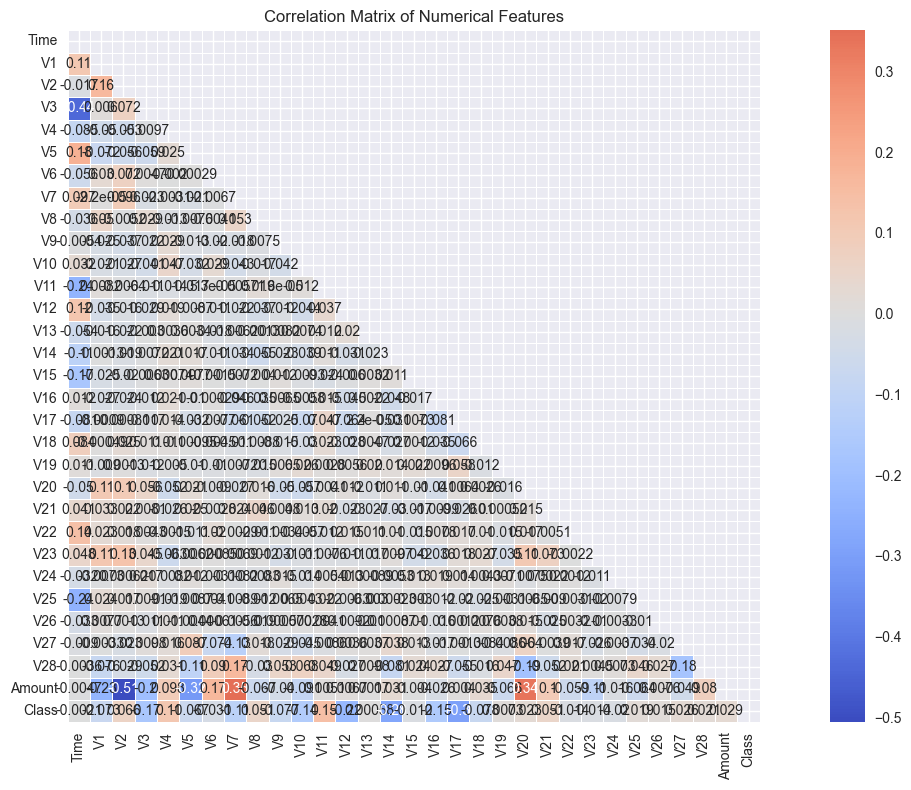


Top correlations with Class:
V17: 0.297
V14: 0.283
V12: 0.221
V3: 0.166
V16: 0.153
V11: 0.146
V10: 0.143
V4: 0.114
V7: 0.112


In [18]:
# Credit card data correlation (sample)
print("Credit Card Data - Correlation Analysis (Sample):")
eda_analyzer.correlation_analysis(creditcard_sample, 'Class')


In [19]:
# Initialize feature engineer
feature_engineer = FeatureEngineer()

print("🔧 FEATURE ENGINEERING")
print("=" * 50)

# Create time-based features for fraud data
print("Creating time-based features...")
fraud_with_time_features = feature_engineer.create_time_features(
    fraud_data_merged, 'purchase_time'
)

print(f"Added time features. New shape: {fraud_with_time_features.shape}")
print(f"New time features: {[col for col in fraud_with_time_features.columns if col not in fraud_data_merged.columns]}")


INFO:feature_engineer:Created time-based features from purchase_time


🔧 FEATURE ENGINEERING
Creating time-based features...
Added time features. New shape: (151112, 23)
New time features: ['hour_of_day', 'day_of_week', 'day_of_month', 'month', 'year', 'quarter', 'is_weekend', 'is_night', 'is_business_hours', 'time_period']


In [20]:
# Calculate time since signup
print("\nCalculating time since signup...")
fraud_with_signup_features = feature_engineer.calculate_time_since_signup(
    fraud_with_time_features, 'signup_time', 'purchase_time'
)

print(f"Added signup features. New shape: {fraud_with_signup_features.shape}")
signup_features = [col for col in fraud_with_signup_features.columns 
                  if 'signup' in col.lower() and col not in fraud_with_time_features.columns]
print(f"New signup features: {signup_features}")


INFO:feature_engineer:Calculated time since signup features



Calculating time since signup...
Added signup features. New shape: (151112, 30)
New signup features: ['time_since_signup_seconds', 'time_since_signup_minutes', 'time_since_signup_hours', 'time_since_signup_days', 'signup_to_purchase_category']


In [21]:
# Calculate transaction frequency and velocity
print("\nCalculating transaction frequency and velocity...")
fraud_with_frequency = feature_engineer.calculate_transaction_frequency(
    fraud_with_signup_features, 'user_id', 'device_id', 'purchase_time'
)

print(f"Added frequency features. New shape: {fraud_with_frequency.shape}")
frequency_features = [col for col in fraud_with_frequency.columns 
                     if col not in fraud_with_signup_features.columns]
print(f"New frequency features: {frequency_features[:10]}...")  # Show first 10



Calculating transaction frequency and velocity...


INFO:feature_engineer:Calculated transaction frequency and velocity features


Added frequency features. New shape: (151112, 48)
New frequency features: ['user_transaction_count', 'user_first_transaction', 'user_last_transaction', 'user_total_spent', 'user_avg_transaction_value', 'user_transaction_value_std', 'user_activity_duration_days', 'user_transaction_velocity', 'device_transaction_count', 'device_unique_users']...


In [22]:
# Create anomaly detection features
print("\nCreating anomaly detection features...")
fraud_with_anomalies = feature_engineer.create_anomaly_features(fraud_with_frequency)

print(f"Added anomaly features. New shape: {fraud_with_anomalies.shape}")
anomaly_features = [col for col in fraud_with_anomalies.columns 
                   if col not in fraud_with_frequency.columns]
print(f"New anomaly features: {anomaly_features}")


INFO:feature_engineer:Created anomaly detection features



Creating anomaly detection features...
Added anomaly features. New shape: (151112, 56)
New anomaly features: ['purchase_value_zscore', 'high_value_transaction', 'top_5_percent_value', 'top_1_percent_value', 'unusual_age', 'minor_transaction', 'unusual_hour', 'high_velocity_user']


In [23]:
# Create interaction features
print("\nCreating interaction features...")
fraud_final_features = feature_engineer.create_interaction_features(fraud_with_anomalies)

print(f"Final engineered dataset shape: {fraud_final_features.shape}")
interaction_features = [col for col in fraud_final_features.columns 
                       if col not in fraud_with_anomalies.columns]
print(f"New interaction features: {interaction_features}")

print(f"\n✅ Feature engineering complete!")
print(f"Original features: {fraud_data_merged.shape[1]}")
print(f"Final features: {fraud_final_features.shape[1]}")
print(f"Features added: {fraud_final_features.shape[1] - fraud_data_merged.shape[1]}")



Creating interaction features...


INFO:feature_engineer:Created interaction features


Final engineered dataset shape: (151112, 60)
New interaction features: ['value_hour_interaction', 'value_weekend_interaction', 'age_frequency_interaction', 'signup_value_interaction']

✅ Feature engineering complete!
Original features: 13
Final features: 60
Features added: 47


In [24]:
print("🔄 DATA TRANSFORMATION AND ENCODING")
print("=" * 50)

# Identify categorical columns to encode
categorical_cols = ['source', 'browser', 'sex', 'country', 'time_period', 'signup_to_purchase_category']
categorical_cols = [col for col in categorical_cols if col in fraud_final_features.columns]

print(f"Categorical columns to encode: {categorical_cols}")

# Encode categorical features
fraud_encoded = preprocessor.encode_categorical_features(
    fraud_final_features, categorical_cols, method='onehot'
)

print(f"Shape after encoding: {fraud_encoded.shape}")


🔄 DATA TRANSFORMATION AND ENCODING
Categorical columns to encode: ['source', 'browser', 'sex', 'country', 'time_period', 'signup_to_purchase_category']
Shape after encoding: (151112, 73)


In [25]:
# Prepare features for scaling (exclude non-numeric and target columns)
exclude_cols = ['class', 'user_id', 'device_id', 'signup_time', 'purchase_time', 'ip_address']
numeric_cols = fraud_encoded.select_dtypes(include=[np.number]).columns.tolist()
cols_to_scale = [col for col in numeric_cols if col not in exclude_cols]

print(f"\nColumns to scale: {len(cols_to_scale)}")
print(f"First few columns: {cols_to_scale[:10]}")

# Scale features
fraud_scaled = preprocessor.scale_features(
    fraud_encoded, cols_to_scale, method='standard'
)

print(f"Final processed shape: {fraud_scaled.shape}")



Columns to scale: 45
First few columns: ['purchase_value', 'age', 'hour_of_day', 'day_of_week', 'day_of_month', 'month', 'year', 'quarter', 'is_weekend', 'is_night']


INFO:data_preprocessor:Scaled 45 features using standard scaling


Final processed shape: (151112, 73)


In [26]:
# Initialize imbalance handler
imbalance_handler = ImbalanceHandler(random_state=42)

print("⚖️ CLASS IMBALANCE HANDLING")
print("=" * 50)

# Prepare data for imbalance handling
X = fraud_scaled.drop(['class'], axis=1)
y = fraud_scaled['class']

# Remove any remaining non-numeric columns
X = X.select_dtypes(include=[np.number])

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Analyze class distribution
distribution = imbalance_handler.analyze_class_distribution(y)

# Get recommendation for sampling strategy
recommendation = imbalance_handler.recommend_sampling_strategy(y, 'medium')
print(f"\n💡 Recommended strategy: {recommendation}")


⚖️ CLASS IMBALANCE HANDLING
Features shape: (151112, 47)
Target shape: (151112,)


INFO:imbalance_handler:Class distribution analysis completed. Imbalance ratio: 0.1033
INFO:imbalance_handler:Class distribution analysis completed. Imbalance ratio: 0.1033
INFO:imbalance_handler:Recommendation for imbalance ratio 0.1033: SMOTE or combined SMOTE-Tomek



💡 Recommended strategy: SMOTE or combined SMOTE-Tomek


In [27]:
# Create balanced train-test split with SMOTE
print("\nCreating balanced train-test split...")
X_train, X_test, y_train, y_test = imbalance_handler.create_balanced_train_test_split(
    X, y, test_size=0.2, sampling_method='smote', variant='standard'
)

print(f"\n📊 Final Dataset Shapes:")
print(f"  Training features: {X_train.shape}")
print(f"  Training target: {y_train.shape}")
print(f"  Test features: {X_test.shape}")
print(f"  Test target: {y_test.shape}")

# Show class distribution in training set
from collections import Counter
train_distribution = Counter(y_train)
test_distribution = Counter(y_test)

print(f"\n📈 Class Distribution:")
print(f"  Training set: {dict(train_distribution)}")
print(f"  Test set: {dict(test_distribution)}")


INFO:imbalance_handler:Original train set shape: (120889, 47)
INFO:imbalance_handler:Original train class distribution: Counter({0: 109568, 1: 11321})



Creating balanced train-test split...


INFO:imbalance_handler:SMOTE (standard) completed. New shape: (219136, 47)
INFO:imbalance_handler:Balanced train set shape: (219136, 47)
INFO:imbalance_handler:Balanced train class distribution: Counter({0: 109568, 1: 109568})



📊 Final Dataset Shapes:
  Training features: (219136, 47)
  Training target: (219136,)
  Test features: (30223, 47)
  Test target: (30223,)

📈 Class Distribution:
  Training set: {0: 109568, 1: 109568}
  Test set: {0: 27393, 1: 2830}


In [28]:
print("💳 PROCESSING CREDIT CARD DATASET")
print("=" * 50)

# Process credit card dataset
cc_features = creditcard_data_clean.drop(['Class'], axis=1)
cc_target = creditcard_data_clean['Class']

print(f"Credit card features shape: {cc_features.shape}")
print(f"Credit card target shape: {cc_target.shape}")

# Analyze class distribution
cc_distribution = imbalance_handler.analyze_class_distribution(cc_target)

# Get recommendation
cc_recommendation = imbalance_handler.recommend_sampling_strategy(cc_target, 'large')
print(f"\n💡 Credit card recommended strategy: {cc_recommendation}")


💳 PROCESSING CREDIT CARD DATASET
Credit card features shape: (283726, 30)
Credit card target shape: (283726,)


INFO:imbalance_handler:Class distribution analysis completed. Imbalance ratio: 0.0017
INFO:imbalance_handler:Class distribution analysis completed. Imbalance ratio: 0.0017
INFO:imbalance_handler:Recommendation for imbalance ratio 0.0017: Random undersampling or Tomek links



💡 Credit card recommended strategy: Random undersampling or Tomek links


In [29]:
# Create balanced split for credit card data using undersampling (due to large size)
print("\nCreating balanced split for credit card data...")
cc_X_train, cc_X_test, cc_y_train, cc_y_test = imbalance_handler.create_balanced_train_test_split(
    cc_features, cc_target, test_size=0.2, sampling_method='undersample', method='random'
)

print(f"\n📊 Credit Card Final Dataset Shapes:")
print(f"  Training features: {cc_X_train.shape}")
print(f"  Training target: {cc_y_train.shape}")
print(f"  Test features: {cc_X_test.shape}")
print(f"  Test target: {cc_y_test.shape}")

# Show class distribution
cc_train_distribution = Counter(cc_y_train)
cc_test_distribution = Counter(cc_y_test)

print(f"\n📈 Credit Card Class Distribution:")
print(f"  Training set: {dict(cc_train_distribution)}")
print(f"  Test set: {dict(cc_test_distribution)}")



Creating balanced split for credit card data...


INFO:imbalance_handler:Original train set shape: (226980, 30)
INFO:imbalance_handler:Original train class distribution: Counter({0: 226602, 1: 378})
INFO:imbalance_handler:Undersampling (random) completed. New shape: (756, 30)
INFO:imbalance_handler:Balanced train set shape: (756, 30)
INFO:imbalance_handler:Balanced train class distribution: Counter({0: 378, 1: 378})



📊 Credit Card Final Dataset Shapes:
  Training features: (756, 30)
  Training target: (756,)
  Test features: (56746, 30)
  Test target: (56746,)

📈 Credit Card Class Distribution:
  Training set: {0: 378, 1: 378}
  Test set: {0: 56651, 1: 95}


In [30]:
# Create feature summary
print("📝 CREATING FEATURE SUMMARY")
print("=" * 50)

feature_summary = create_feature_summary(fraud_final_features, 'class')
print(f"Feature summary created with {len(feature_summary)} features")

# Display top features by different criteria
print("\n🔍 Feature Insights:")
print(f"  Numerical features: {feature_summary['is_numeric'].sum()}")
print(f"  Categorical features: {feature_summary['is_categorical'].sum()}")
print(f"  Features with missing values: {(feature_summary['null_count'] > 0).sum()}")

# Show features with highest uniqueness
high_unique = feature_summary.nlargest(5, 'unique_values')[['feature', 'unique_values', 'dtype']]
print("\n🎯 Features with highest uniqueness:")
print(high_unique)


📝 CREATING FEATURE SUMMARY
Feature summary created with 59 features

🔍 Feature Insights:
  Numerical features: 47
  Categorical features: 8
  Features with missing values: 2

🎯 Features with highest uniqueness:
                   feature  unique_values           dtype
0                  user_id         151112           int64
1              signup_time         151112  datetime64[ns]
2            purchase_time         150679  datetime64[ns]
30  user_first_transaction         150679  datetime64[ns]
31   user_last_transaction         150679  datetime64[ns]


In [31]:
# Save processed datasets
print("\n💾 SAVING PROCESSED DATA")
print("=" * 50)

# Create processed data directory
import os
os.makedirs('../data/processed', exist_ok=True)

# Save fraud detection datasets
save_processed_data(X_train, '../data/processed/fraud_X_train.csv')
save_processed_data(X_test, '../data/processed/fraud_X_test.csv')
save_processed_data(pd.DataFrame(y_train), '../data/processed/fraud_y_train.csv')
save_processed_data(pd.DataFrame(y_test), '../data/processed/fraud_y_test.csv')

# Save credit card datasets
save_processed_data(cc_X_train, '../data/processed/creditcard_X_train.csv')
save_processed_data(cc_X_test, '../data/processed/creditcard_X_test.csv')
save_processed_data(pd.DataFrame(cc_y_train), '../data/processed/creditcard_y_train.csv')
save_processed_data(pd.DataFrame(cc_y_test), '../data/processed/creditcard_y_test.csv')

# Save feature summary
save_processed_data(feature_summary, '../data/processed/feature_summary.csv')

print("\n✅ All processed data saved successfully!")



💾 SAVING PROCESSED DATA


INFO:utils:Saved processed data to ..\data\processed\fraud_X_train.csv
INFO:utils:Saved processed data to ..\data\processed\fraud_X_test.csv
INFO:utils:Saved processed data to ..\data\processed\fraud_y_train.csv
INFO:utils:Saved processed data to ..\data\processed\fraud_y_test.csv
INFO:utils:Saved processed data to ..\data\processed\creditcard_X_train.csv
INFO:utils:Saved processed data to ..\data\processed\creditcard_X_test.csv
INFO:utils:Saved processed data to ..\data\processed\creditcard_y_train.csv
INFO:utils:Saved processed data to ..\data\processed\creditcard_y_test.csv
INFO:utils:Saved processed data to ..\data\processed\feature_summary.csv



✅ All processed data saved successfully!


In [32]:
# Save experiment configuration
experiment_config = {
    'datasets': {
        'fraud_data': {
            'original_shape': fraud_data.shape,
            'final_shape': fraud_final_features.shape,
            'features_added': fraud_final_features.shape[1] - fraud_data.shape[1]
        },
        'creditcard_data': {
            'original_shape': creditcard_data.shape,
            'final_shape': cc_features.shape
        }
    },
    'preprocessing': {
        'missing_value_strategy': fraud_missing_strategy,
        'categorical_encoding': 'onehot',
        'scaling_method': 'standard',
        'ip_geolocation_merged': True
    },
    'feature_engineering': {
        'time_features': True,
        'signup_features': True,
        'frequency_features': True,
        'anomaly_features': True,
        'interaction_features': True
    },
    'class_imbalance': {
        'fraud_data_method': 'smote',
        'creditcard_data_method': 'undersample',
        'train_test_split': 0.2
    },
    'class_distributions': {
        'fraud_original': dict(fraud_imbalance['class_distribution']),
        'fraud_balanced': dict(train_distribution),
        'creditcard_original': dict(cc_distribution['class_counts']),
        'creditcard_balanced': dict(cc_train_distribution)
    }
}

save_experiment_config(experiment_config, '../data/processed/experiment_config.json')

print("\n⚙️ Experiment configuration saved!")
print("\n🎉 Data Analysis and Preprocessing Complete!")
print("\n📋 Summary:")
print(f"  ✓ Loaded and cleaned 3 datasets")
print(f"  ✓ Merged IP geolocation data")
print(f"  ✓ Engineered {fraud_final_features.shape[1] - fraud_data.shape[1]} new features")
print(f"  ✓ Handled class imbalance with SMOTE and undersampling")
print(f"  ✓ Created balanced train-test splits")
print(f"  ✓ Saved all processed data and configurations")
print(f"\n🚀 Ready for machine learning model development!")


INFO:utils:Saved experiment config to ..\data\processed\experiment_config.json



⚙️ Experiment configuration saved!

🎉 Data Analysis and Preprocessing Complete!

📋 Summary:
  ✓ Loaded and cleaned 3 datasets
  ✓ Merged IP geolocation data
  ✓ Engineered 49 new features
  ✓ Handled class imbalance with SMOTE and undersampling
  ✓ Created balanced train-test splits
  ✓ Saved all processed data and configurations

🚀 Ready for machine learning model development!
